In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model


### **Part A: Numerical Prediction**

### Step 1: Locate, input and clean suitable data

In [176]:

df = pd.read_csv('https://raw.githubusercontent.com/YALINYAN-YU/DAV5010/master/employee_data.csv')
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   id                1000 non-null   int64 
 2   groups            1000 non-null   object
 3   age               1000 non-null   int64 
 4   healthy_eating    1000 non-null   int64 
 5   active_lifestyle  1000 non-null   int64 
 6   salary            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [178]:
df.describe()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,999.000000,64.000000,10.000000,10.000000,5550.00000


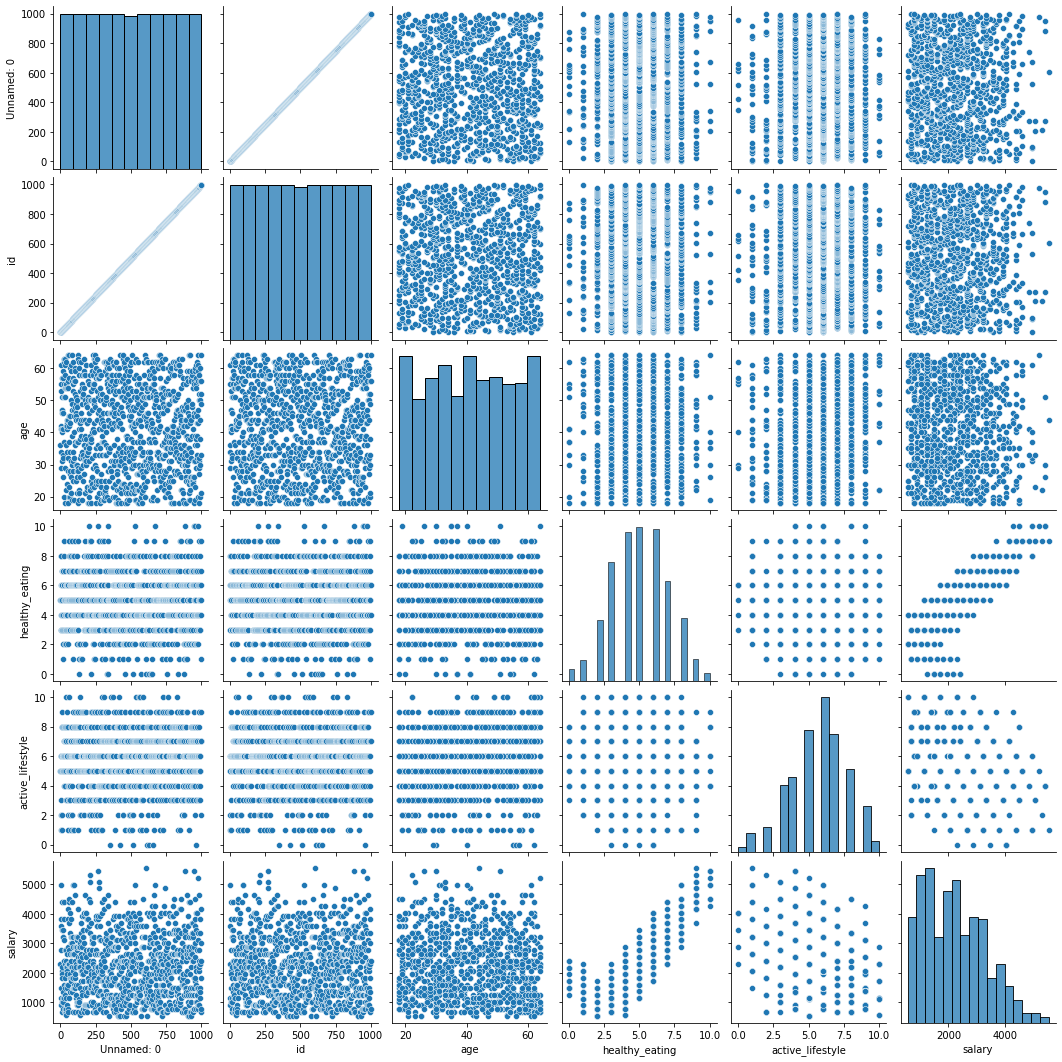

In [90]:
sns.pairplot(df)

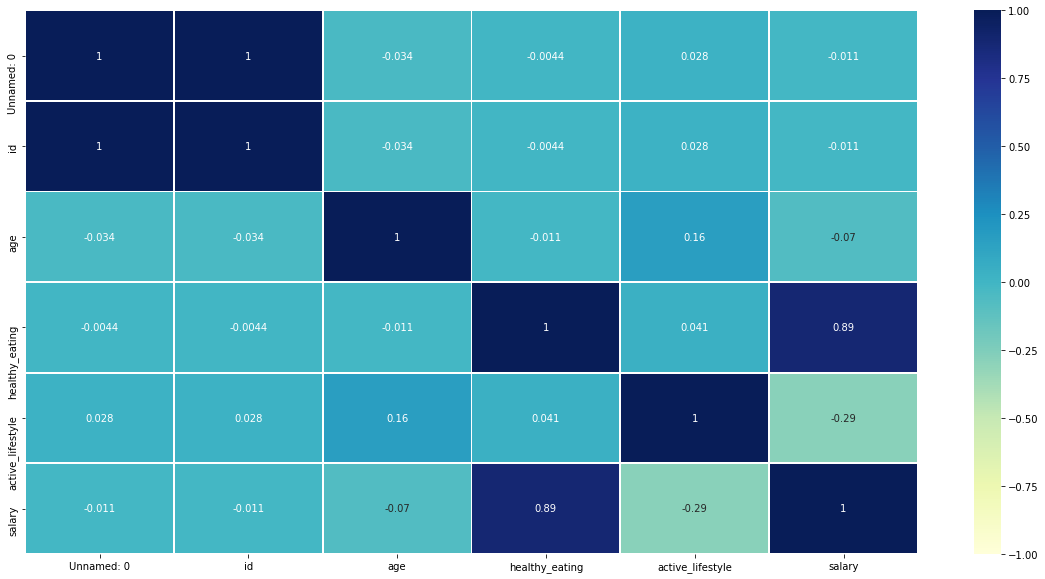

In [110]:
#Finally, we can check correlations

plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df.corr(method='spearman'), vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='YlGnBu');

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Linear regression**

In [91]:
df1 = df[['healthy_eating','salary']]
df1

,healthy_eating,salary
0,5,2297
1,3,1134
2,8,4969
3,3,902
4,6,3574
...,...,...
995,7,2996
996,1,667
997,9,4158
998,6,2414


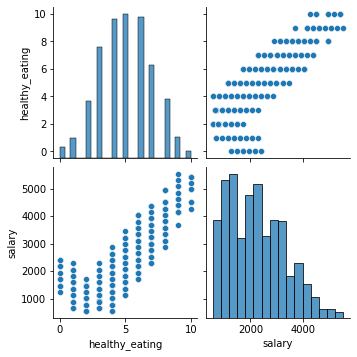

In [92]:
sns.pairplot(df1)

In [93]:
# Cooking the data
X = df1['healthy_eating']
X.head()

0    5
1    3
2    8
3    3
4    6
Name: healthy_eating, dtype: int64

In [94]:
# Cooking the data
y = df1['salary']
y.head()

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64

In [95]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split

In [96]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [97]:
# Create new axis for x column, change df to numpy
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [99]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)

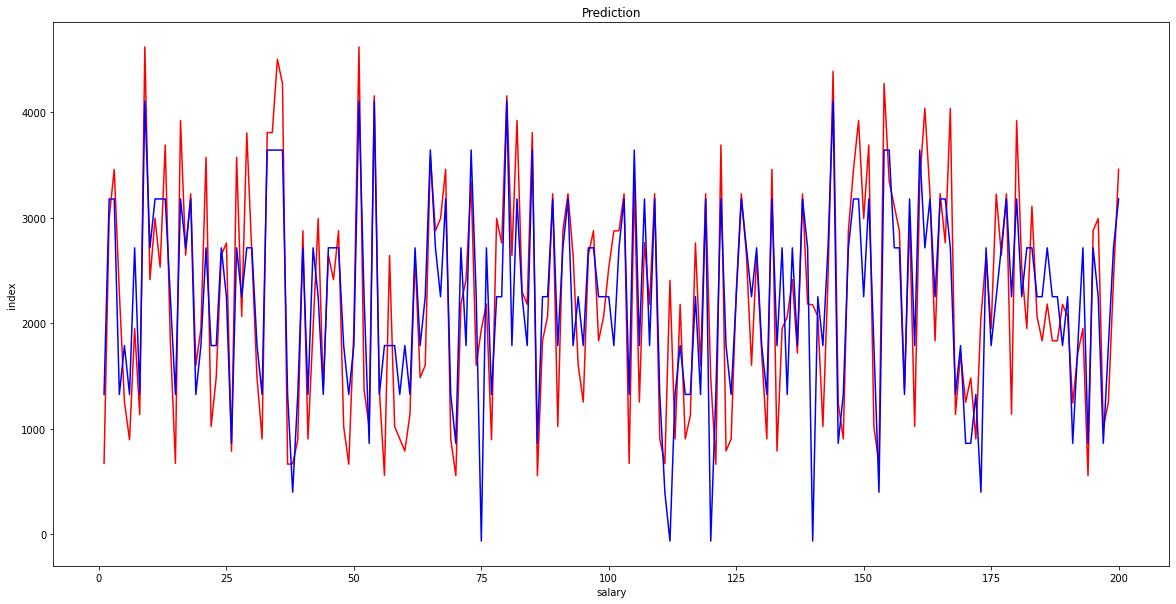

In [101]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [102]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [103]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)

In [104]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [105]:
# Calculate RMSE  vale
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [106]:
print('mean squared error :',mse)
print('r square :',rsq)
print('RMSE :',rmse)

mean squared error : 355459.18422406656
r square : 0.6761163376307
RMSE : 596.2039787053308


In [107]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: -67.59601245280373
Coefficient of the line: [463.82700631]


In [87]:
y = 463.827x - 67.596

SyntaxError: ignored

### **OXboost**

In [108]:
#Check missing 2
df.isna().sum()

Unnamed: 0          0
id                  0
groups              0
age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [111]:
df.describe()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,999.000000,64.000000,10.000000,10.000000,5550.00000


In [128]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

In [179]:
del df['Unnamed: 0']

In [180]:
del df['groups']

In [132]:
df.head()

,id,age,healthy_eating,active_lifestyle,salary
0,0,36,5,5,2297
1,1,55,3,5,1134
2,2,61,8,1,4969
3,3,29,3,6,902
4,4,34,6,2,3574


In [133]:
df.describe()

,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,64.000000,10.000000,10.000000,5550.00000


In [134]:
#Separate the target variable and rest of the variables using .iloc to subset the data.

X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [135]:
X.head()

,id,age,healthy_eating,active_lifestyle
0,0,36,5,5
1,1,55,3,5
2,2,61,8,1
3,3,29,3,6
4,4,34,6,2


In [136]:
X.shape

(1000, 4)

In [137]:
y.shape

(1000,)

In [138]:
#Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed 
#performance and efficiency gains. You will use this later in the tutorial.

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.

In [140]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [141]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
# calculate Mean square error
mse = mean_squared_error(y_test,preds)



In [145]:
# Calculate R square vale
rsq = r2_score(y_test,preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))


In [146]:
print('mean squared error :',mse)
print('r square :',rsq)
#print('RMSE :',rmse)

mean squared error : 1218262.8523769812
r square : -0.012272199152782992


In [142]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1103.749452


### **Some form of decision tree**

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [148]:
df.head()

,id,age,healthy_eating,active_lifestyle,salary
0,0,36,5,5,2297
1,1,55,3,5,1134
2,2,61,8,1,4969
3,3,29,3,6,902
4,4,34,6,2,3574


In [181]:
del df['id']

In [182]:
df.head()

,age,healthy_eating,active_lifestyle,salary
0,36,5,5,2297
1,55,3,5,1134
2,61,8,1,4969
3,29,3,6,902
4,34,6,2,3574


In [159]:
# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
#y = iris.target


#iris = datasets.load_iris()
X, y = df.iloc[:,:-2],df.iloc[:,-2]
#X = iris.data[:, 2:]
#y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


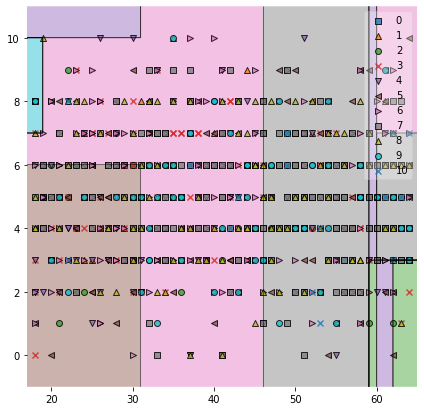

In [161]:
from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))

y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(figsize=(7, 7))

plot_decision_regions(X_combined, y_combined, clf=clf_tree)

No handles with labels found to put in legend.


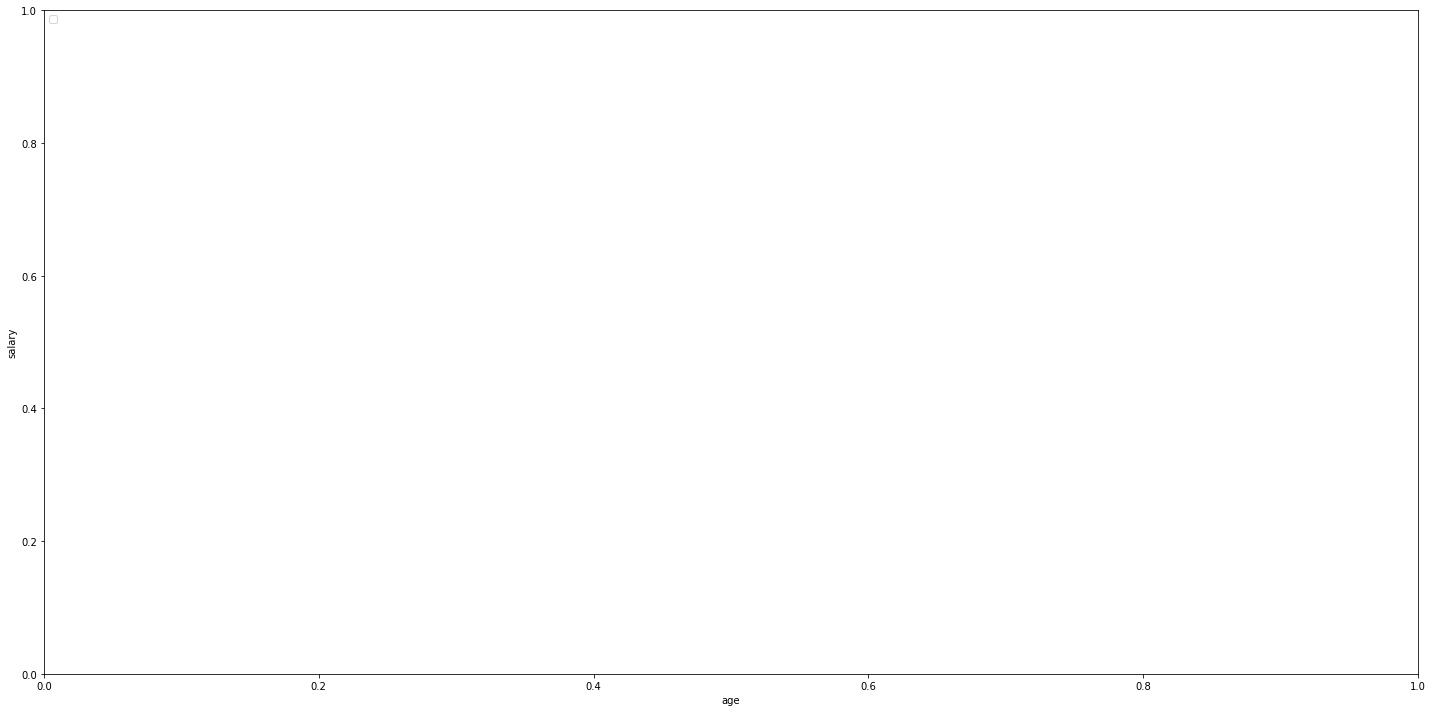

In [164]:
plt.xlabel('age')

plt.ylabel('salary')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

NameError: ignored

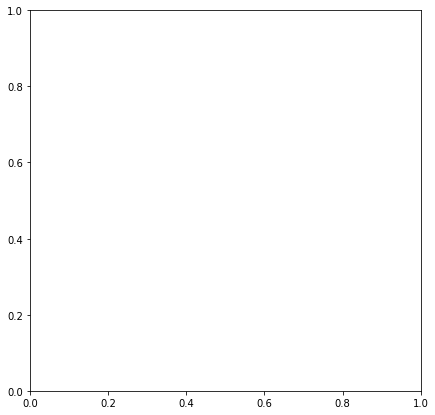

In [165]:
from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))

y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(figsize=(7, 7))

plot_decision_regions(X_combined, y_combined, clf=clf_tree,
                      feature_index=[2,3],                       #these one will be plotted  
                      filler_feature_values={2: age, 3: healthy_eating},  #these will be ignored
                      filler_feature_ranges={2: age, 3: healthy_eating})



### **SVM**

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [174]:
df.head()

,age,healthy_eating
0,36,5
1,55,3
2,61,8
3,29,3
4,34,6


In [ ]:
# import some data to play with

X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [184]:
df3 = df.iloc[:,:2]
df3.head()

,age,healthy_eating
0,36,5
1,55,3
2,61,8
3,29,3
4,34,6


In [185]:
X, y = df.iloc[:,:2],df.iloc[:,-1]

In [200]:
X.head()

,age,healthy_eating
0,36,5
1,55,3
2,61,8
3,29,3
4,34,6


In [187]:
y.head()

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64

In [197]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  
# SVM regularization parameter
svc = svm.SVC(kernel='linear',  C=1,gamma=1).fit(X, y)


In [199]:
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1

TypeError: ignored

In [198]:
# create a mesh to plot in

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

TypeError: ignored

### **Step 3: Analyze model performance metrics (RMSE, MAE and R2) and select the best model**

As we compared the previous RMSE, MAE and R2 for each model, so we can figure out that the OXboost have best performance.



### **Part B: Yes/No Predict**

### **Step 1: Locate, input and clean suitable data**

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/YALINYAN-YU/DAV5010/master/consolidated_coin_data%20copy.csv', thousands=',')
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680


In [202]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,28944.000000,28944.000000,28944.000000,28944.000000,2.894400e+04,2.894400e+04
mean,300.719915,309.832983,290.858557,300.947534,8.133058e+08,7.194826e+09
std,1373.884681,1416.598573,1325.072633,1374.461221,3.059516e+09,2.469322e+10
min,0.001352,0.001509,0.001227,0.001357,0.000000e+00,0.000000e+00
25%,0.205108,0.212444,0.196527,0.205346,2.418700e+05,6.345143e+07
50%,2.995000,3.090000,2.880000,2.980000,5.212684e+06,3.453673e+08
75%,24.430000,25.530000,23.270000,24.430000,1.554764e+08,3.422403e+09
max,19475.800000,20089.000000,18974.100000,19497.400000,5.350913e+10,3.265025e+11


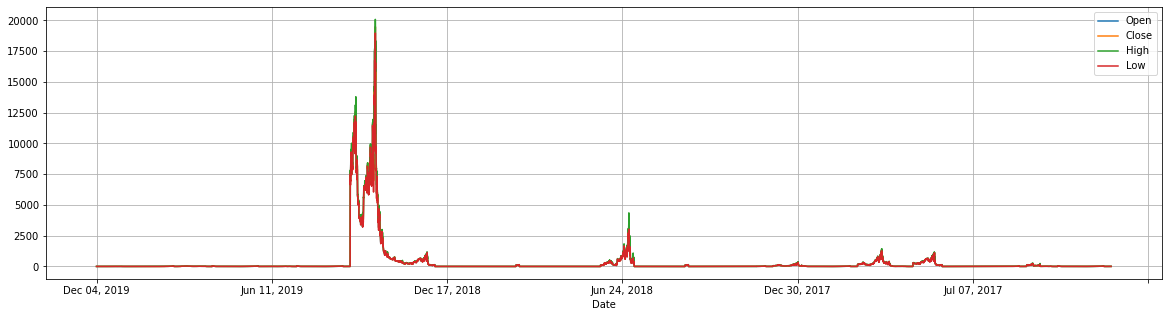

In [203]:
df.plot(x='Date', y=["Open", "Close", "High", "Low"] ,figsize=(20,5), grid=True  )

In [205]:
df["price change"] = ""
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,price change
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509,
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342,
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179,
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390,
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680,
...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979,
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596,
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918,
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964,


In [207]:
import math

In [208]:
df.assign(changeRate=df['price change']).head(-2)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,price change,changeRate
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509,0,0
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342,-0.0454545,-0.0454545
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179,0.0634921,0.0634921
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390,0.0223881,0.0223881
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680,-0.0218978,-0.0218978
...,...,...,...,...,...,...,...,...,...,...
28937,bitcoin-sv,"May 04, 2013",3.03,3.64,2.90,3.48,0.0,60290868,-0.0521978,-0.0521978
28938,bitcoin-sv,"May 03, 2013",3.39,3.45,2.40,3.04,0.0,52694847,0.171014,0.171014
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979,0.0792079,0.0792079
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596,0.0481651,0.0481651


In [209]:
df['changeRate']=''
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,price change,changeRate
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509,0,
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342,-0.0454545,
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179,0.0634921,
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390,0.0223881,
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680,-0.0218978,
...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979,0.0792079,
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596,0.0481651,
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918,0,
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964,-0.0371991,


In [211]:
N = len(df['changeRate'])

for i in range(N):
  
    
    df['changeRate'].iloc[i] = abs(df['price change'].iloc[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [212]:
df['breakout']=''
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,price change,changeRate,breakout
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509,0,0,
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342,-0.0454545,0.0454545,
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179,0.0634921,0.0634921,
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390,0.0223881,0.0223881,
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680,-0.0218978,0.0218978,
...,...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0.0,58287979,0.0792079,0.0792079,
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0.0,65604596,0.0481651,0.0481651,
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0.0,74020918,0,0,
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0.0,75388964,-0.0371991,0.0371991,


In [213]:
N = len(df['breakout'])

for i in range(N):
  if df['changeRate'].iloc[i] >= 5:
    df['breakout'].iloc[i] = 1
  else:
    df['breakout'].iloc[i] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [215]:
del df['Currency']
del df['Date']
del df['price change']
del df['changeRate']

### **Step 2: Construct at least 3 different logistic models using Python**

Binary Logistic Regression

Multinomial Logistic Regression

Ordinal Logistic Regression

In [216]:
df.head()

,Open,High,Low,Close,Volume,Market Cap,breakout
0,1.29,1.32,1.25,1.25,46048752.0,824588509,0
1,1.24,1.32,1.21,1.29,41462224.0,853213342,0
2,1.25,1.26,1.20,1.24,27574097.0,817872179,0
3,1.33,1.34,1.25,1.25,24127567.0,828296390,0
4,1.31,1.37,1.31,1.33,28706667.0,879181680,0


In [217]:
x=df.drop(["breakout"],axis=1)
y=df["breakout"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [218]:
log_reg=LogisticRegression()
X= x_train.to_numpy()
Y= y_train.to_numpy().astype(int)
log_reg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
# Follow: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

log_reg.score(X,Y)
#print("Accuracy: " + str(acc_score(log_reg)))
#confusion_matrix_model(log_reg)

0.9994385661844094

### **Step 3: Analyze model performance metrics**

(AUC, ROC, Confusion Matrix) and select the best logistic model

# Part C: Clustering
Step 1: Use your Part A or Part B dataset

Step 2: Create a cluster model
You do not need to employ multiple algorithms here. Just explain what approach you used.

Step 3: Explain the clusters
And what you can learn from them.


In [220]:

df = pd.read_csv('https://raw.githubusercontent.com/YALINYAN-YU/DAV5010/master/employee_data.csv')
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [222]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans

In [ ]:
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [224]:
# define dataset
X, _ = df(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


TypeError: ignored

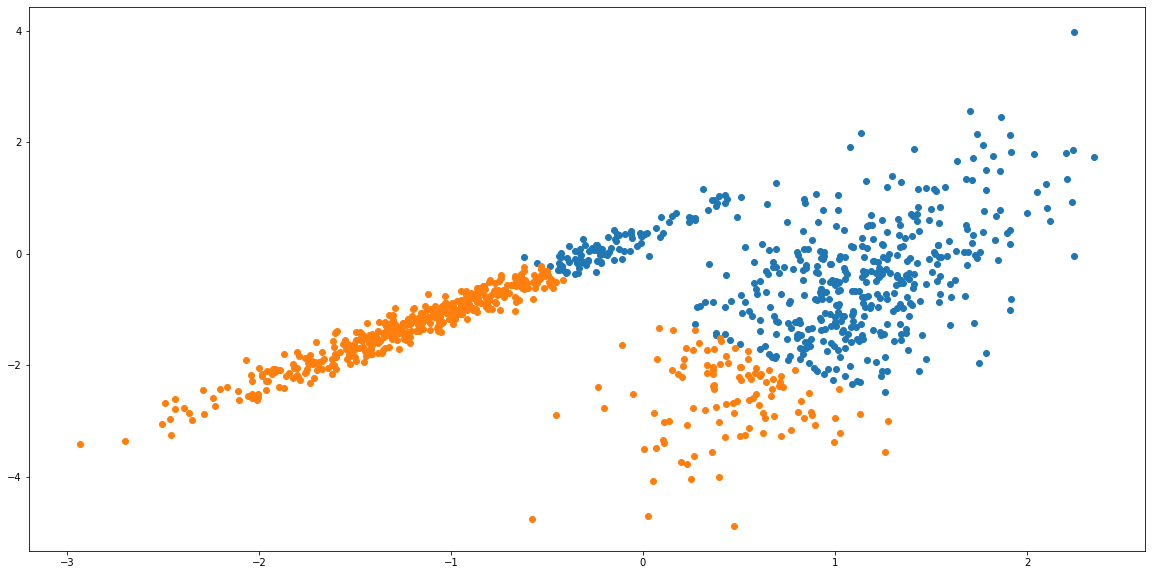

In [225]:

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [229]:
print(make_classification)

<function make_classification at 0x7f70a22dfd08>
